In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
## Data Generation Code

## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)

genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [3]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,876,881,877,898,893,1016,1009,964,958,1019
gene2,84,111,97,84,83,920,920,946,922,958
gene3,752,731,691,741,730,472,476,483,461,453
gene4,957,936,964,975,887,647,642,617,594,621
gene5,532,594,550,528,537,945,936,920,910,916
...,...,...,...,...,...,...,...,...,...,...
gene96,136,138,128,122,127,595,588,567,560,618
gene97,574,594,604,561,585,148,147,155,146,148
gene98,595,621,595,562,591,174,192,150,178,172
gene99,470,420,445,383,416,279,268,282,317,293


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, gene1 to gene100
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   wt1     100 non-null    object
 1   wt2     100 non-null    object
 2   wt3     100 non-null    object
 3   wt4     100 non-null    object
 4   wt5     100 non-null    object
 5   ko1     100 non-null    object
 6   ko2     100 non-null    object
 7   ko3     100 non-null    object
 8   ko4     100 non-null    object
 9   ko5     100 non-null    object
dtypes: object(10)
memory usage: 12.7+ KB


In [5]:
## Perform PCA on the data

## First center and scale the data

scaled_data = preprocessing.scale(data.T)

In [6]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

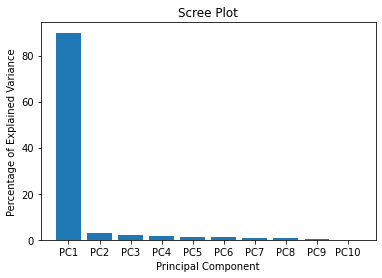

In [7]:
## Draw a scree plot and a PCA plot

 
## The following code constructs the Scree plot

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

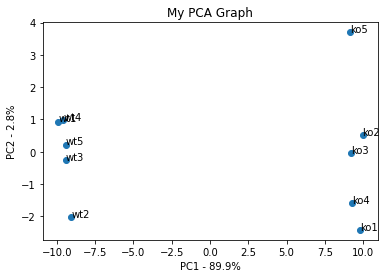

In [8]:
## the following code makes a fancy looking plot using PC1 and PC2

pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [9]:
## Determine which genes had the biggest influence on PC1

## get the name of the top 10 measurements (genes) that contribute most to pc1.

## first, get the loading scores

loading_scores = pd.Series(pca.components_[0], index=genes)


## now sort the loading scores based on their magnitude

sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)


# get the names of the top 10 genes

top_10_genes = sorted_loading_scores[0:10].index.values

In [11]:
## print the gene names and their scores (and +/- sign)

loading_scores[top_10_genes]

gene86    0.105444
gene33    0.105391
gene27   -0.105366
gene15   -0.105358
gene64    0.105356
gene7     0.105355
gene50    0.105348
gene9     0.105344
gene35   -0.105340
gene74   -0.105338
dtype: float64